In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [29]:
YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
EmploymentSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA04-2023-04-20T164954.csv')


In [30]:
# mergedTable=pd.merge(YearinBusinessDF,ReceiptSizeOfFirmDF,on='Geographic Area Name (NAME)')
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)


#**Count of observations by Race Group and Years in Business

In [31]:
mergedTables[['Meaning of Race code (RACE_GROUP_LABEL)']].drop_duplicates()
mergedTables = mergedTables.loc[mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'] != 'Total']




### rename the values for the graph

In [32]:
replacement_dict = {
    'American Indian and Alaska Native': 'Native American ', 
    'Native Hawaiian and Other Pacific Islander': 'Islander', 
    'Equally minority/nonminority': 'Minority',
    'Black or African American': 'African American',
    'Total': 'Unclassifiable'
}
mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'] = mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'].replace(replacement_dict)

### Graph shows that same proportion of business years also same portion of race in each business

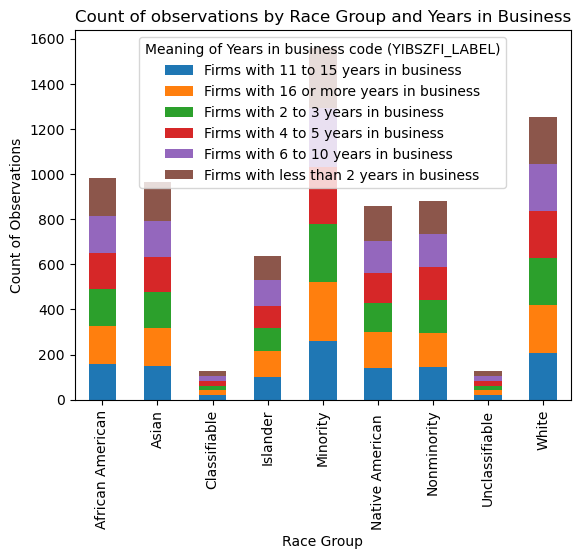

In [33]:

import matplotlib.pyplot as plt

# count the number of observations in each group
grouped_df = mergedTables.groupby(['Meaning of Race code (RACE_GROUP_LABEL)', 'Meaning of Years in business code (YIBSZFI_LABEL)']).size().reset_index(name='COUNT')

# pivot the data to create a stacked bar chart
df = grouped_df.pivot(index='Meaning of Race code (RACE_GROUP_LABEL)', columns='Meaning of Years in business code (YIBSZFI_LABEL)', values='COUNT')

# plot the stacked bar chart
df.plot(kind='bar', stacked=True)

# set the title of the chart
plt.title('Count of observations by Race Group and Years in Business')

# set the labels for the x- and y-axes
plt.xlabel('Race Group')
plt.ylabel('Count of Observations')

# show the chart
plt.show()

##Male and Female proportion on business in USA

In [ ]:
YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)
mergedTables.columns

In [35]:

import plotly.express as px
# count the number of  value in the SEX_LABEL column
grouped_df = mergedTables['Meaning of Sex code (SEX_LABEL)'].value_counts().reset_index(name='Count')
grouped_df.rename(columns={'index': 'Sex'}, inplace=True)

# create treemap with the grouped data
fig = px.treemap(grouped_df, path=['Sex'], values='Count')

# show the plot
fig.show()

**male and female has almost same proportion on business

In [36]:
#Tree map on SEX_LABEL
#### male and female proportion on business in USA(exclude total from values)
import plotly.express as px
# count the number of value in the SEX_LABEL column, excluding the "Total" value
grouped_df = mergedTables[mergedTables['Meaning of Sex code (SEX_LABEL)'] != 'Total']['Meaning of Sex code (SEX_LABEL)'].value_counts().reset_index(name='Count')
grouped_df.rename(columns={'index': 'Sex'}, inplace=True)

# create treemap with the grouped data
fig = px.treemap(grouped_df, path=['Sex'], values='Count')

# show the plot
fig.show()

In [37]:
YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)
mergedTables.columns

Index(['Geographic Area Name (NAME)', '2017 NAICS code (NAICS2017)',
       'Meaning of NAICS code (NAICS2017_LABEL)',
       'Meaning of Sex code (SEX_LABEL)',
       'Meaning of Ethnicity code (ETH_GROUP_LABEL)',
       'Meaning of Race code (RACE_GROUP_LABEL)',
       'Meaning of Veteran code (VET_GROUP_LABEL)',
       'Meaning of Years in business code (YIBSZFI_LABEL)', 'Year (YEAR)',
       'Number of employer firms (FIRMPDEMP)',
       'Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)',
       'Number of employees (EMP)', 'Annual payroll ($1,000) (PAYANN)',
       'Relative standard error of employer firms (%) (FIRMPDEMP_S)',
       'Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)',
       'Relative standard error of number of employees (%) (EMP_S)',
       'Relative standard error of annual payroll (%) (PAYANN_S)',
       'Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LA

In [38]:
mergedTables= mergedTables.loc[:, ['Meaning of Years in business code (YIBSZFI_LABEL)']]
mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].replace({
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus',
})

*The largest number of the years in business is within 2 years, and the smallest number of the years business is 4-5 years

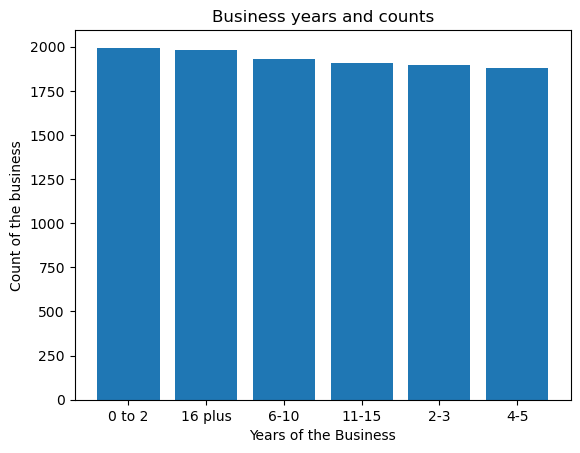

In [39]:
#### Filter the DataFrame to exclude rows with YIBSZFI_LABEL equal to 'Meaning of years in business code'
# yb_df = yb_df1.loc[yb_df1['YIBSZFI_LABEL'] != 'Meaning of Years in business code']

# Plot the data using the filtered DataFrame
plt.bar(mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().index, mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().values)

plt.xlabel('Years of the Business')
plt.ylabel('Count of the business')
plt.title('Business years and counts')
plt.show()

In [ ]:
YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)
mergedTables.columns

## Business Wealth vs size of emplyer (first box and whisker graph)
  Business Wealth vs size of employer and number of employees

The average Business sales and value of shipments , and revenue  was $241,000, and median was 129,000 in 2018.
average number of employer was 319, and medeian was 253 in 2018.
avearge employee in 2018 was 247

In [54]:
import plotly.graph_objects as go
mergedTables 

# Convert the 'Annual payroll' and 'Number of employer firms' columns to numeric values
mergedTables['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)']= pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

# Sort the data in ascending order by the 'Annual payroll' column
mergedTables_sorted = mergedTables.sort_values('Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)')

fig = go.Figure()

fig.add_trace(go.Box(
    y=mergedTables_sorted['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'],
    name='Business Wealth',
    text=['Business Wealth'],
    marker_color='darkblue',
    boxmean=True # represent mean
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employer firms (FIRMPDEMP)'],
    name='Number of Employer Firms',
    text=['Number of Employer Firms'],
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))
fig.update_layout(
    title="Business wealth and Number of Employer Firms",
    xaxis=dict(title="Variables"),
    yaxis=dict(title="Values")
)

fig.show()


In [55]:
import plotly.graph_objects as go

# Convert the 'Annual payroll' and 'Number of employer firms' columns to numeric values
mergedTables['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

# Sort the data in ascending order by the 'Annual payroll' column
mergedTables_sorted = mergedTables.sort_values('Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)')

fig = go.Figure()

fig.add_trace(go.Box(
    y=mergedTables_sorted['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'],
    name='Business Wealth',
    text=['Business Wealth'],
    hovertemplate='Business wealth: %{y:$.2f}<extra></extra>',
    marker_color='darkblue',
    boxmean=True # represent mean
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employer firms (FIRMPDEMP)'],
    name='Number of Employer Firms',
    text=['Number of Employer Firms'],
    hovertemplate='Number of Employer Firms: %{y:.0f}<extra></extra>',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employees (EMP)'],
    name='Number of employees',
    text=['Number of employees'],
    hovertemplate='Number of employees: %{y:.0f}<extra></extra>',
    marker_color='pink',
    boxmean='sd' # represent mean and standard deviation
))

fig.update_layout(
    title="Business Wealth and Number of Employer Firms vs Employee",
    xaxis=dict(title="Variables"),
    yaxis=dict(title="Values", range=[0, 7000])
)

fig.show()
